In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
path="D:\DA with Python\cereal.csv"
df=pd.read_csv(path)

In [2]:
df.to_csv('cereal.csv')

In [3]:
df=df._get_numeric_data()
df.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.0,25.0,3.0,1.0,0.33,68.402973
1,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.0,0.0,3.0,1.0,1.00,33.983679
2,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.0,25.0,3.0,1.0,0.33,59.425505
3,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.0,25.0,3.0,1.0,0.50,93.704912
4,110.0,2.0,2.0,200.0,1.0,14.0,8.0,-1.0,25.0,3.0,1.0,0.75,34.384843


In [4]:
#Libraries for plotting


In [5]:
%%capture
! pip install ipywidgets

In [6]:
from IPython.display import display
from IPython.html import widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

C:\Users\akhil\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [7]:
#Function for Plotting

In [8]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width=6
    height=5
    plt.figure(figsize=(width,height))
    
    ax1=sns.distplot(RedFunction, hist=False, color='r', label=RedName)
    ax2=sns.distplot(BlueFunction, hist=False, color='b', label=BlueName, ax=ax1)
    
    plt.title(Title)
    plt.xlabel('Rating')
    plt.ylabel('Proportion of Nuts')
    
    plt.show()
    plt.close()

In [122]:
def PollyPlot(xtrain, xtest, ytrain, ytest, lr, poly_transform):
    width=6
    height=5
    plt.figure(figsize=(width, height))
    
    #training the data
    #testing the data
    #lr is the linear regression object
    #poly_transform: polynomial tranformation object
    
    xmax=max([xtrain.values.max(), xtest.values.max()])
    xmin=min([xtrain.values.min(), xtest.values.min()])
    
    x=np.arange(xmin, xmax, 0.1)
    
    plt.plot(xtrain, ytrain, 'ro', label='Traning Data')
    plt.plot(xtest, ytest, 'go', label='Test Data')
    
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1,1))), label='Predicted Fucntion')
    plt.ylim([-10, 100])
    plt.ylabel('Rating')
    plt.legend()

In [123]:
#Training and Testing

In [124]:
y_data=df['rating']

In [125]:
x_data=df.drop('rating',axis=1)

In [126]:
#Now we split our data into training and testing data using train_test_split


In [127]:
x_data=x_data.fillna(0)

In [128]:
y_data=y_data.fillna(0)

In [129]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x_data,y_data, test_size=0.4, random_state=0)

print('num of test samples: ', xtest.shape[0])
print('num of training samples: ', xtrain.shape[0])

num of test samples:  31
num of training samples:  46


In [130]:
#Import linear regression from linear_model
from sklearn.linear_model import LinearRegression

In [131]:
lre=LinearRegression()

In [132]:
xtrain

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
2,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.0,25.0,3.0,1.00,0.33
28,120.0,3.0,0.0,240.0,5.0,14.0,12.0,190.0,25.0,3.0,1.33,0.67
11,110.0,6.0,2.0,290.0,2.0,17.0,1.0,105.0,25.0,1.0,1.00,1.25
23,100.0,2.0,0.0,190.0,1.0,18.0,5.0,80.0,25.0,3.0,1.00,0.75
10,120.0,1.0,2.0,220.0,0.0,12.0,12.0,35.0,25.0,2.0,1.00,0.75
31,110.0,1.0,1.0,280.0,0.0,15.0,9.0,45.0,25.0,2.0,1.00,0.75
40,110.0,2.0,1.0,260.0,0.0,21.0,3.0,40.0,25.0,2.0,1.00,1.50
57,100.0,5.0,2.0,0.0,2.7,-1.0,-1.0,110.0,0.0,1.0,1.00,0.67
1,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.0,0.0,3.0,1.00,1.00
32,100.0,3.0,1.0,140.0,3.0,15.0,5.0,85.0,25.0,3.0,1.00,0.88


In [133]:
lre.fit(xtrain[['calories']],ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [134]:
#Calculate R^2 on test data
lre.score(xtest[['calories']], ytest)

-0.17142144104107926

In [135]:
lre.score(xtrain[['calories']], ytrain)

0.04528472681781781

In [136]:
#Cross-Validation Score

In [137]:
from sklearn.model_selection import cross_val_score

In [138]:
Rcross=cross_val_score(lre,x_data[['calories']],y_data,cv=4)

In [139]:
Rcross

array([-0.22183888, -0.2880046 , -0.74291576, -0.36603369])

In [140]:
#Calculate the AVG and STANDARD DEVIATION of our estimate:
print('Mean of folds are:', Rcross.mean(), 'and SD is:', Rcross.std())

Mean of folds are: -0.40469823152866796 and SD is: 0.2018297505610368


In [141]:
#neg_mean_squared_error
-1*cross_val_score(lre,x_data[['calories']], y_data,cv=4,scoring='neg_mean_squared_error')


array([377.86572972, 268.74882515, 500.69203714, 254.77281919])

In [142]:
#Cross Val Predict
from sklearn.model_selection import cross_val_predict

In [143]:
yhat=cross_val_predict(lre,x_data[['calories']],y_data,cv=4)

In [144]:
yhat

array([37.78838394, 43.16807296, 37.78838394, 35.63650834, 42.09213515,
       42.09213515, 42.09213515, 44.24401076, 39.94025955, 39.94025955,
       43.16807296, 42.09213515, 43.16807296, 42.09213515, 42.09213515,
       42.09213515, 41.01619735, 42.09213515, 42.09213515, 42.09213515,
       42.53185944, 41.65279004, 42.53185944, 42.53185944, 41.65279004,
       41.65279004, 42.53185944, 51.32255338, 40.77372065, 41.65279004,
       42.53185944, 41.65279004, 42.53185944, 41.65279004, 40.77372065,
       40.77372065, 41.65279004, 41.65279004, 41.65279004, 33.67696918,
       40.47414533, 42.73987071, 40.47414533, 42.73987071, 65.39712455,
       65.39712455, 29.14551841, 42.73987071, 38.20841994, 33.67696918,
       45.0055961 , 35.94269456, 38.20841994, 42.73987071, 54.06849763,
       54.06849763, 42.73987071, 42.73987071, 39.89563985, 39.26749167,
       38.95341758, 39.58156576, 39.58156576, 38.63934348, 38.95341758,
       38.95341758, 39.58156576, 39.58156576, 38.95341758, 39.58

In [145]:
xtrain

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
2,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.0,25.0,3.0,1.00,0.33
28,120.0,3.0,0.0,240.0,5.0,14.0,12.0,190.0,25.0,3.0,1.33,0.67
11,110.0,6.0,2.0,290.0,2.0,17.0,1.0,105.0,25.0,1.0,1.00,1.25
23,100.0,2.0,0.0,190.0,1.0,18.0,5.0,80.0,25.0,3.0,1.00,0.75
10,120.0,1.0,2.0,220.0,0.0,12.0,12.0,35.0,25.0,2.0,1.00,0.75
31,110.0,1.0,1.0,280.0,0.0,15.0,9.0,45.0,25.0,2.0,1.00,0.75
40,110.0,2.0,1.0,260.0,0.0,21.0,3.0,40.0,25.0,2.0,1.00,1.50
57,100.0,5.0,2.0,0.0,2.7,-1.0,-1.0,110.0,0.0,1.0,1.00,0.67
1,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.0,0.0,3.0,1.00,1.00
32,100.0,3.0,1.0,140.0,3.0,15.0,5.0,85.0,25.0,3.0,1.00,0.88


In [146]:
ytrain

2     59.425505
28    41.015492
11    50.764999
23    44.330856
10    18.042851
31    23.804043
40    39.241114
57    50.828392
1     33.983679
32    52.076897
66    31.230054
14    22.736446
76    36.187559
19    40.448772
29    28.025765
63    68.235885
35    21.871292
18    22.396513
0     68.402973
75    51.592193
15    41.445019
5     29.509541
55    63.005645
16    45.863324
51    30.450843
20    64.533816
71    46.658844
8     49.120253
13    40.400208
25    31.435973
37    28.742414
17    35.782791
24    32.207582
46    30.313351
39    36.471512
65    72.801787
58    39.259197
12    19.823573
36    31.072217
21    46.895644
9     53.313813
73    27.753301
67    53.131324
64    74.472949
47    40.105965
44     0.000000
Name: rating, dtype: float64

In [147]:
#Overfitting, UnderFitting, Model Selection

In [148]:
lr=LinearRegression()
lr.fit(xtrain[['fat','sugars','protein','calories']],ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [149]:
#Prediction using training data
yhat_train=lr.predict(xtrain[['fat','sugars','protein','calories']])
yhat_train

array([50.29411237, 42.36575334, 65.673587  , 45.54378179, 21.64908196,
       30.00508975, 44.51459252, 62.20589539, 25.02213246, 46.6200872 ,
       26.93022808, 24.14363493, 37.187774  , 35.08842798, 25.60899864,
       51.50840338, 23.11444566, 24.14363493, 48.82874867, 49.55081461,
       49.15560766, 29.61603146, 49.46510799, 49.9398729 , 36.69554893,
       58.58792086, 49.55081461, 38.75630448, 39.72944312, 31.71537748,
       31.71537748, 30.25001377, 29.86095549, 34.34275321, 43.48302624,
       57.9068224 , 37.7247382 , 21.40415793, 39.97436715, 49.15560766,
       50.58000388, 25.60899864, 72.02488987, 57.9068224 , 39.43740295,
       34.62497458])

In [150]:
#Prediction using Test data
yhat_test=lr.predict(xtest[['fat','sugars','protein','calories']])
yhat_test

array([36.40350876, 49.55081461, 37.58298095, 43.74778744, 40.16561756,
       48.33037493, 44.86268333, 54.87292821, 34.62497458, 44.51459252,
       34.62497458, 43.39731962, 60.8997491 , 31.32631919, 55.26813516,
       39.62627634, 33.57594813, 46.23102891, 54.97609499, 40.11850141,
       44.90365081, 54.19182975, 49.15560766, 50.87204405, 44.51459252,
       33.03660692, 34.7940108 , 36.15620772, 32.54675886, 30.89014475,
       41.77273851])

In [151]:
#Lets perform model evaluation using train and test data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

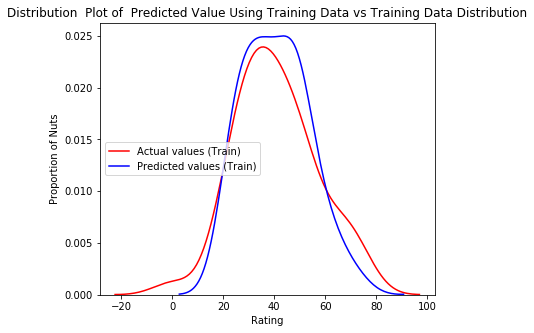

In [152]:
#Examin ethe distribution of predicted values of training data
Title='Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(ytrain,yhat_train, "Actual values (Train)", 'Predicted values (Train)', Title)

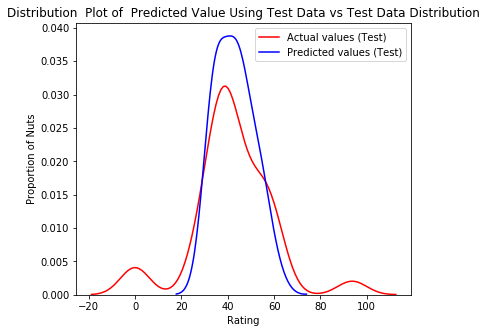

In [153]:
#Examin ethe distribution of predicted values of training data
Title='Distribution  Plot of  Predicted Value Using Test Data vs Test Data Distribution'
DistributionPlot(ytest,yhat_test, "Actual values (Test)", 'Predicted values (Test)', Title)

In [154]:
#Polynomail Fit
from sklearn.preprocessing import PolynomialFeatures

In [155]:
#Overfitting occurs when the model fits the noise, not the underlying process. 
#Therefore when testing your model using the test-set, your model does not perform as well as it is modelling noise, 
#not the underlying process that generated the relationship. Let's create a degree 5 polynomial model.

In [156]:
xtrain, xtest, ytrain, ytest=train_test_split(x_data, y_data, test_size =0.45, random_state=0)

In [157]:
pr=PolynomialFeatures(degree=2)
xtrain_pr=pr.fit_transform(xtrain[['calories']])
xtest_pr=pr.fit_transform(xtest[['calories']])
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [158]:
poly=LinearRegression()
poly.fit(xtrain_pr,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [159]:
yhat=poly.predict(xtest_pr)
yhat[0:5]

array([35.07044039, 45.2196297 , 45.2196297 , 47.79053971, 35.07044039])

In [160]:
#lets take five predicted values and compare it to the actual targets
print("Predicted Values:", yhat[0:4])
print("True values:", ytest[0:4].values)

Predicted Values: [35.07044039 45.2196297  45.2196297  47.79053971]
True values: [29.924285 49.787445 39.7034   60.756112]


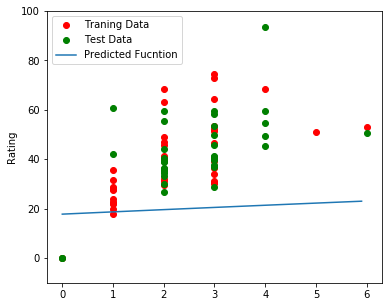

In [161]:
#Now we use Pollyplot fucntion 
PollyPlot(xtrain[['protein']], xtest[['protein']], ytrain, ytest, poly, pr)

In [162]:
#R^2 of training data
poly.score(xtrain_pr,ytrain)


0.3351350370645101

In [163]:
#R^2 of test data
poly.score(xtest_pr,ytest)

0.4420091241231035

In [164]:
#We see the R^2 for the training data is 0.335 while the R^2 on the test data was 0.44. 
#The lower the R^2, the worse the model, a Negative R^2 is a sign of overfitting.

Text(3, 0.75, 'Maximum R^2')

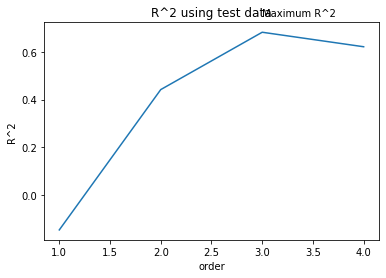

In [165]:
Rsqu_test=[]

order=[1,2,3,4]
for n in order:
    pr= PolynomialFeatures(degree=n)
    xtrain_pr=pr.fit_transform(xtrain[['calories']])
    xtest_pr=pr.fit_transform(xtest[['calories']])
    lr.fit(xtrain_pr,ytrain)
    
    Rsqu_test.append(lr.score(xtest_pr,ytest))
    
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 using test data')
plt.text(3,0.75,'Maximum R^2')

In [166]:
def f(order, test_data):
    xtrain, xtest, ytrain, ytest = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    xtrain_pr = pr.fit_transform(xtrain[['calories']])
    xtest_pr = pr.fit_transform(xtest[['calories']])
    poly = LinearRegression()
    poly.fit(xtrain_pr,ytrain)
    PollyPlot(xtrain[['calories']], xtest[['calories']], ytrain,ytest, poly, pr)

In [167]:
#The following interface allows you to experiment with different polynomial orders and different amounts of data.

In [168]:
interact(f, order=(0,6,1), test_data=(0.05,0.95,0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [169]:
pr=PolynomialFeatures(degree=2)
xtrain_pr=pr.fit_transform(xtrain[['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins','shelf','weight','cups']])
xtest_pr=pr.fit_transform(xtest[['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins','shelf','weight','cups']])

In [170]:
#Import Ridge from linear model
from sklearn.linear_model import Ridge

In [171]:
RidgeModel=Ridge(alpha=0.1)

In [172]:
RidgeModel.fit(xtrain_pr,ytrain)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [173]:
yhat=RidgeModel.predict(xtest_pr)

In [174]:
print('Predicted Values:', yhat[0:4])
print('test_set', ytest[0:4].values
     )

Predicted Values: [33.63810963 50.28786927 33.82541606 53.40238566]
test_set [29.924285 49.787445 39.7034   60.756112]


In [176]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RidgeModel = Ridge(alpha=alfa) 
    RidgeModel.fit(xtrain_pr, ytrain)
    Rsqu_test.append(RidgeModel.score(xtest_pr, ytest))
    Rsqu_train.append(RidgeModel.score(xtrain_pr, ytrain))

C:\Users\akhil\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


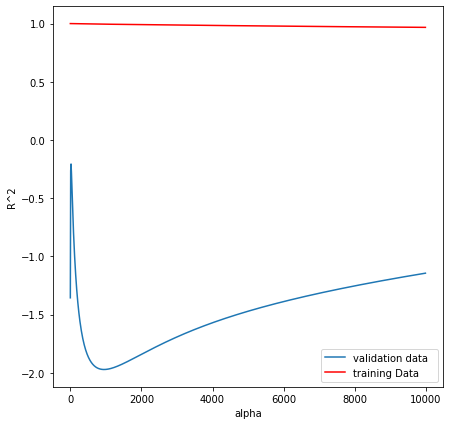

In [177]:
width = 7
height = 7
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [178]:
#GRID SEARCH

In [179]:
from sklearn.model_selection import GridSearchCV

In [180]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [181]:
RR=Ridge()
RR

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [182]:
#Create a ridge grid search object
Grid1=GridSearchCV(RR, parameters1,cv=4)

In [184]:
Grid1.fit(x_data[['fat','sugars','protein','calories']],y_data)

C:\Users\akhil\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [185]:
#The object finds the best parameter values on the validation data. 
#We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows:

BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [186]:
#We now test our model on test data
BestRR.score(xtest[['fat','sugars','protein','calories']], ytest)

0.5215605132355741